<a href="https://colab.research.google.com/github/rohanvitrouthu/sectoralstockanalysis/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [23]:
import pandas as pd

In [24]:
auto_df = pd.read_csv('/content/drive/MyDrive/MS/4th Sem/DATA 606 Capstone/Dataset/Merged Data/Automobile.csv')

In [25]:
auto_df.shape

(28848, 15)

In [26]:
auto_df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,28848.000000,28848.000000,28848.000000,28848.000000,28848.000000,28848.000000,28848.000000,2.884800e+04,2.884800e+04,1.473600e+04,2.681100e+04,26811.000000
mean,2437.547348,2440.908397,2473.993093,2404.229392,2437.479004,2437.981588,2439.157630,2.543878e+06,1.475192e+14,5.409280e+04,7.735241e+05,0.473960
std,4864.825506,4873.437173,4932.603403,4802.757388,4863.387995,4864.839049,4866.558147,1.016441e+07,2.690573e+14,6.300665e+04,1.837288e+06,0.188442
min,17.700000,17.050000,17.750000,15.000000,17.700000,17.700000,17.220000,2.500000e+01,6.300000e+07,2.000000e+01,2.500000e+01,0.034300
25%,393.450000,394.800000,402.825000,385.650000,393.537500,393.500000,393.937500,1.874470e+05,2.020365e+13,1.915650e+04,9.496600e+04,0.338700
50%,835.750000,837.000000,850.825000,820.025000,835.800000,835.800000,836.690000,5.355265e+05,7.462465e+13,3.605150e+04,2.567090e+05,0.478300
75%,2190.325000,2193.600000,2222.525000,2156.012500,2190.925000,2191.475000,2191.642500,1.425177e+06,1.784349e+14,6.977400e+04,6.164900e+05,0.603700
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,3.905778e+08,9.365671e+15,1.318669e+06,7.333848e+07,1.000000


In [27]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28848 entries, 0 to 28847
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                28848 non-null  object 
 1   Symbol              28848 non-null  object 
 2   Series              28848 non-null  object 
 3   Prev Close          28848 non-null  float64
 4   Open                28848 non-null  float64
 5   High                28848 non-null  float64
 6   Low                 28848 non-null  float64
 7   Last                28848 non-null  float64
 8   Close               28848 non-null  float64
 9   VWAP                28848 non-null  float64
 10  Volume              28848 non-null  int64  
 11  Turnover            28848 non-null  float64
 12  Trades              14736 non-null  float64
 13  Deliverable Volume  26811 non-null  float64
 14  %Deliverble         26811 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 3.3

In [28]:
auto_df.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1/3/2000,TATAMOTORS,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448780e+13,NaN,NaN,NaN
1,1/4/2000,TATAMOTORS,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2,1/5/2000,TATAMOTORS,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357680e+13,NaN,NaN,NaN
3,1/6/2000,TATAMOTORS,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435930e+13,NaN,NaN,NaN
4,1/7/2000,TATAMOTORS,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197640e+13,NaN,NaN,NaN


Considering the data of TATAMOTORS stock for regression analysis

In [29]:
tata_motors_df = auto_df[auto_df['Symbol'] == 'TATAMOTORS'].copy()
tata_motors_df.shape

(5306, 15)

In [30]:
tata_motors_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1/3/2000,TATAMOTORS,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448780e+13,NaN,NaN,NaN
1,1/4/2000,TATAMOTORS,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2,1/5/2000,TATAMOTORS,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357680e+13,NaN,NaN,NaN
3,1/6/2000,TATAMOTORS,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435930e+13,NaN,NaN,NaN
4,1/7/2000,TATAMOTORS,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197640e+13,NaN,NaN,NaN


Setting Date column as the index for the dataframe for interpretability and ease of visualization.

In [31]:
tata_motors_df['Date'] = pd.to_datetime(tata_motors_df['Date'])
tata_motors_df.set_index('Date', inplace = True)

Removing 'Series' column since all the trades are of type EQ or Equity. Also removing other columns with low correlation against the target variable 'VWAP'.

In [32]:
tata_motors_df.drop(['Series', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], axis = 1, inplace = True)
tata_motors_df.head(5)

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP
Date,,,,,,,,
2000-01-03,TATAMOTORS,201.60,207.4,217.25,207.4,217.0,216.75,214.28
2000-01-04,TATAMOTORS,216.75,217.0,219.00,206.0,211.9,208.20,209.50
2000-01-05,TATAMOTORS,208.20,194.0,217.80,194.0,213.1,213.25,210.33
2000-01-06,TATAMOTORS,213.25,215.0,229.90,215.0,222.0,222.10,225.29
2000-01-07,TATAMOTORS,222.10,224.0,239.90,223.1,239.9,239.90,236.32


Standardising all the values in the dataset.

In [33]:
"""from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(tata_motors_df.iloc[:, 2:])
tata_motors_df_std = pd.concat([tata_motors_df.iloc[:, :2],
                               pd.DataFrame(scaled_values, columns = tata_motors_df.columns[2:])], axis = 1)

print('Shape of dataframe: ',tata_motors_df_std.shape)
print('First 5 rows of the dataframe: ', tata_motors_df_std.head(5))"""

"from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaled_values = scaler.fit_transform(tata_motors_df.iloc[:, 2:])\ntata_motors_df_std = pd.concat([tata_motors_df.iloc[:, :2],\n                               pd.DataFrame(scaled_values, columns = tata_motors_df.columns[2:])], axis = 1)\n\nprint('Shape of dataframe: ',tata_motors_df_std.shape)\nprint('First 5 rows of the dataframe: ', tata_motors_df_std.head(5))"

Selecting VWAP as target variable.

In [34]:
X = tata_motors_df.loc[:, ['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close']]
y = tata_motors_df.loc[:, 'VWAP']
print('Sample of features: ', X.head(5))
print('Sample of target: ', y.head(5))

Sample of features:              Prev Close   Open    High    Low   Last   Close
Date                                                       
2000-01-03      201.60  207.4  217.25  207.4  217.0  216.75
2000-01-04      216.75  217.0  219.00  206.0  211.9  208.20
2000-01-05      208.20  194.0  217.80  194.0  213.1  213.25
2000-01-06      213.25  215.0  229.90  215.0  222.0  222.10
2000-01-07      222.10  224.0  239.90  223.1  239.9  239.90
Sample of target:  Date
2000-01-03    214.28
2000-01-04    209.50
2000-01-05    210.33
2000-01-06    225.29
2000-01-07    236.32
Name: VWAP, dtype: float64


Dividing the data into training and testing subsets using TimeSeriesSplit cross validator. This cross validator requires the number of splits to be made in the data. In each iteration, the model will be trained on a larger training subset of the data while the testing subset will remain the same.

In [35]:
# Using TimeSeriesSplit to split the data into training and testing data subsets.
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [36]:
# Initializing an instance of the TimeSeriesSplit cross validator and specifying the number of splits to be made in the data.
tss_cv = TimeSeriesSplit(n_splits = 5)

Building the Linear Regression model.

In [37]:
# Initializing the LinearRegression model.
model = LinearRegression()

In [38]:
# Looping through the splits in data and fitting the model.
for train_index, test_index in tss_cv.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Fit the model
  model.fit(X_train, y_train)

  # Make predictions
  y_pred = model.predict(X_test)

  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  print(f'Mean Squared Error for this split: {mse}')

Mean Squared Error for this split: 15.991475370858396
Mean Squared Error for this split: 14.44337667250415
Mean Squared Error for this split: 18.95032691595681
Mean Squared Error for this split: 1.8546204530414716
Mean Squared Error for this split: 0.8426343351287147


Some visualizations to show the performance of the Linear Regression model on the data.

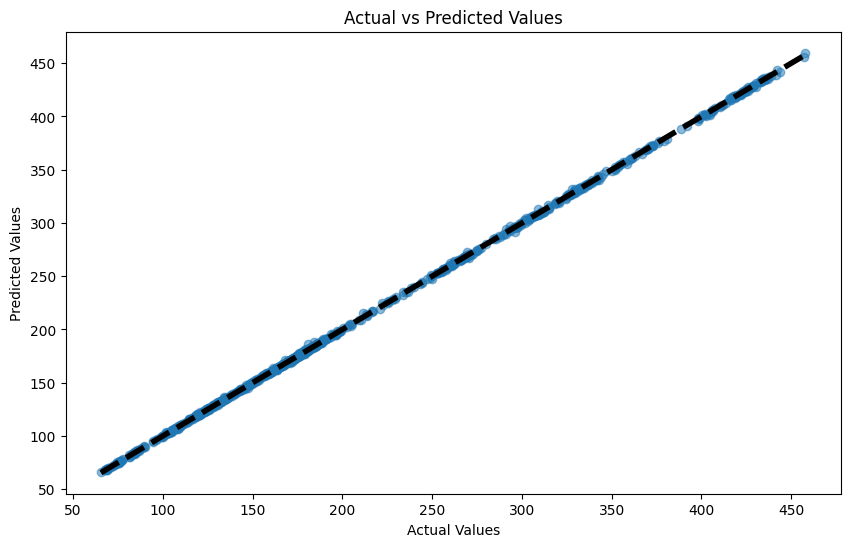

In [39]:
# A plot to show the relationship between actual and predicted values.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line
plt.show()

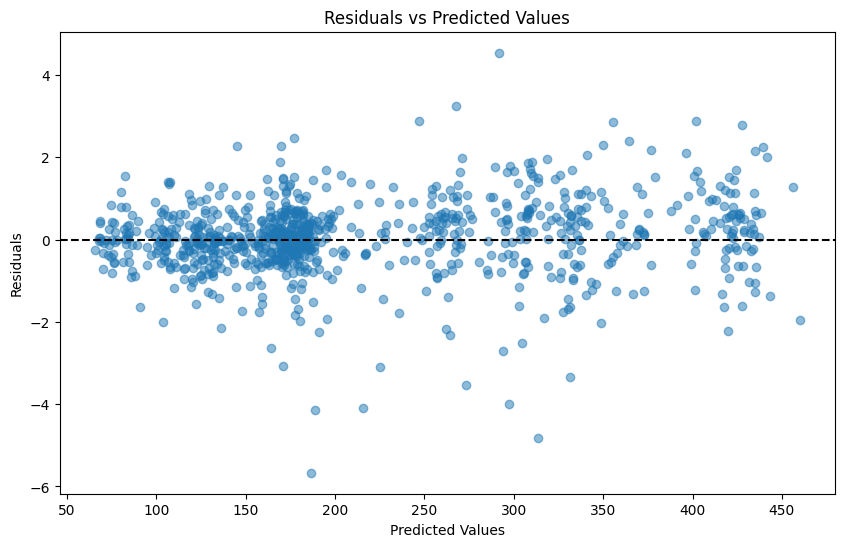

In [40]:
# A plot for residuals

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

Building a Random Forest Regression model.

In [43]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Empty list to store scores
scores = []

# Loop through the splits
for train_index, test_index in tss_cv.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Fit model and evaluate on each fold
  model = RandomForestRegressor()
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))

print(f'Mean R-squared: {np.mean(scores):.3f}')

Mean R-squared: 0.305


In [44]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create RandomForestRegressor
#rf = RandomForestRegressor(random_state=42)

In [46]:
# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=tss_cv, n_jobs=-1, verbose=2)

grid_search.fit(X, y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [47]:
# Best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_:.3f}')

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.306
